In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

from matplotlib.ticker import ScalarFormatter

In [4]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)', '広域予備率平均値(%)' ]

df_select = df_king[cols]
# .dropna()

In [5]:
df_select

,DateTime,gap_price[intra-spot](円/kWh),低下量合計,停止・低下ユニット数合計,intra_volume（MWh/h）,spot_volume(kWh),太陽光絶対値誤差合算(実績-想定)(kWh),風力絶対値誤差合算(実績-想定)(kWh),広域予備率平均値(%)
0,2018-04-01 00:00:00,0.32,53484820.0,126.0,58.8,6098500,0.0,15893.195,NaN
1,2018-04-01 00:30:00,0.59,102677262.0,255.0,54.0,6225500,0.0,17701.670,NaN
2,2018-04-01 01:00:00,0.72,100007262.0,255.0,57.3,6356500,0.0,19567.870,NaN
3,2018-04-01 01:30:00,0.72,100007262.0,255.0,63.0,6439500,0.0,21212.950,NaN
4,2018-04-01 02:00:00,-0.03,100007262.0,255.0,61.6,6439000,0.0,23300.435,NaN
...,...,...,...,...,...,...,...,...,...
84410,2023-01-05 21:30:00,NaN,57207370.0,157.0,NaN,22544600,NaN,NaN,NaN
84411,2023-01-05 22:00:00,NaN,57207370.0,157.0,NaN,22180900,NaN,NaN,NaN
84412,2023-01-05 22:30:00,NaN,57207370.0,157.0,NaN,22143700,NaN,NaN,NaN
84413,2023-01-05 23:00:00,NaN,57632370.0,159.0,NaN,22054200,NaN,NaN,NaN


In [6]:


# 広域予備率あり
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','広域予備率平均値(%)']

df_select = df_king[cols].dropna()

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col
# df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2


percent =50
# これは各年

year=2022
start_point = dt.datetime(2022,1,1,0,0)
end_point = dt.datetime(2022,12,31,23,30)
df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)].dropna()

df['judge'] =0

df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

name=re_col[-1]
value0 = df[df['judge']==0][name].values
value1 = df[df['judge']==1][name].values
times =df['DateTime'].dt.date.values
# changePLOT_HIST_oneyear(name,value0,value1,times,year)
# print(f'ない方の平均値{round(value0.mean(),3)}、あるほうの平均値{round(value1.mean(),3)}')


In [7]:
df

,DateTime,価格差 (時間前市場 - スポット市場) (Yen/kWh),エリア毎の広域予備率の平均値(%),judge
70447,2022-03-21 00:00:00,0.65,21.350000,0
70448,2022-03-21 00:30:00,1.17,22.820000,0
70449,2022-03-21 01:00:00,1.49,22.673333,0
70450,2022-03-21 01:30:00,1.05,22.260000,0
70451,2022-03-21 02:00:00,2.55,21.830000,0
...,...,...,...,...
84170,2022-12-31 21:30:00,0.58,29.185556,0
84171,2022-12-31 22:00:00,0.29,30.443333,0
84172,2022-12-31 22:30:00,0.91,33.145556,0
84173,2022-12-31 23:00:00,0.42,30.802222,0


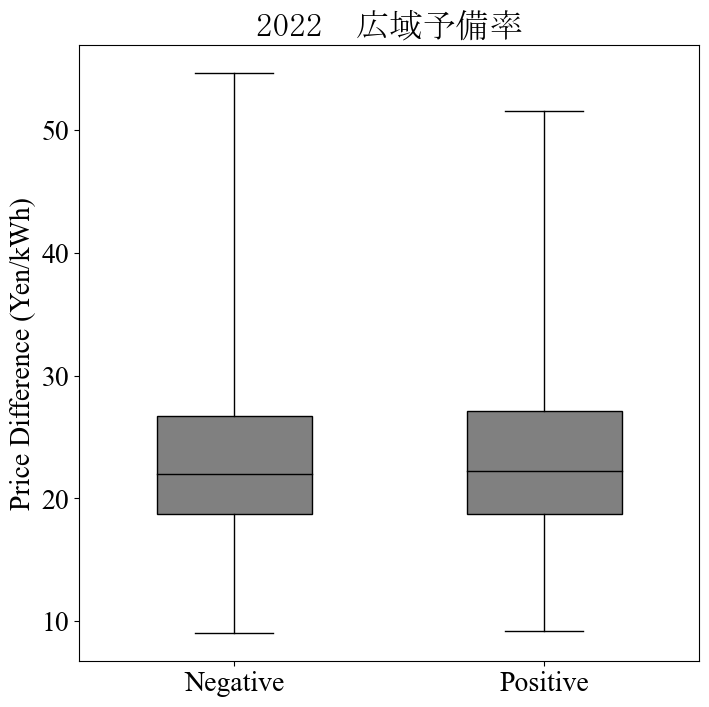

In [26]:
# 広域予備率の箱ひげ
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =20
# data = [value2018,value2019,value2020,value2021,value2022]
data=[value0,value1]

fig =plt.figure(figsize=(8,8))
ax1 = fig.subplots()
ax1.boxplot(data,whis=(0,100),vert=True,  # 横向きにする
           patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='gray',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=1),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=1),  # ヒゲの線の設定
           capprops=dict(color='black', linewidth=1),  # ヒゲの先端の線の設定
           )
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(['Negative','Positive'])
ax1.set_ylabel('Price Difference (Yen/kWh)')
# ax1.set_xlabel('Year')
plt.title(f'{year}  広域予備率'
,fontname='MS Mincho'
)
plt.savefig('../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/広域予備率/箱ひげ広域予備率.png')


In [ ]:
# 広域予備率の箱ひげ
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =20
# data = [value2018,value2019,value2020,value2021,value2022]


data=[value0,value1]

fig =plt.figure(figsize=(8,8))
ax1 = fig.subplots()
ax1.boxplot(data,whis=(0,100),vert=True,  # 横向きにする
           patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='gray',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=1),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=1),  # ヒゲの線の設定
           capprops=dict(color='black', linewidth=1),  # ヒゲの先端の線の設定
           )
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(['Negative','Positive'])
ax1.set_ylabel('Price Difference (Yen/kWh)')
# ax1.set_xlabel('Year')
plt.title(f'{year}  広域予備率'
,fontname='MS Mincho'
)